In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel("Downloads/dataset.xlsx")
df.head()

,Order ID,Product,Quantity \nOrdered,Price Each,Order Date,Purchase Address,Total Earning,Unnamed: 7,City1,Unnamed: 9,Month,Day of the Week
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,944 Walnut St,Boston,MA 02215,January,3
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,185 Maple St,Portland,OR 97035,January,2
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,538 Adams St,San Francisco,CA 94016,January,5
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,738 10th St,Los Angeles,CA 90001,January,7
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,387 10th St,Austin,TX 73301,January,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185945 entries, 0 to 185944
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Order ID           185945 non-null  int64         
 1   Product            185945 non-null  object        
 2   Quantity 
Ordered  185945 non-null  int64         
 3   Price Each         185945 non-null  float64       
 4   Order Date         185945 non-null  datetime64[ns]
 5   Purchase Address   185945 non-null  object        
 6   Total Earning      185945 non-null  float64       
 7   Unnamed: 7         185945 non-null  object        
 8   City1              185945 non-null  object        
 9   Unnamed: 9         185945 non-null  object        
 10  Month              185945 non-null  object        
 11  Day of the Week    185945 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 17.0+ MB


In [5]:
table = df.pivot_table(values= "Total Earning", index= "City1", columns="Product")
table

# With this pivot table we see which product sold how many in cities.

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
City1,,,,,,,,,,,,,,,,,,,
Atlanta,111.291657,390.782663,151.017329,383.169833,5.069910,4.413899,150.356295,100.639889,301.481481,600.000000,600.0,600.0,16.015422,1700.000000,999.990000,12.907078,400.000000,13.102645,702.583026
Austin,110.954825,389.990000,151.675281,379.990000,5.105658,4.571329,150.850340,101.863012,300.000000,600.000000,600.0,600.0,15.924735,1700.000000,999.990000,13.067701,400.000000,13.244086,700.000000
Boston,109.990000,391.148960,150.746570,381.125994,5.228641,4.497345,151.005484,100.988474,301.633394,601.013514,600.0,600.0,16.031188,1703.556485,1002.232130,13.117853,400.000000,13.156435,700.930851
Dallas,110.960500,391.618351,151.800224,380.733620,5.128317,4.537552,150.884583,100.748218,300.715990,600.000000,600.0,600.0,16.201628,1700.000000,999.990000,13.087759,400.000000,13.209590,700.000000
Los Angeles,110.662722,389.990000,150.729474,380.787461,5.181490,4.483194,151.284666,101.228561,301.243094,602.130178,600.0,600.0,16.056777,1700.000000,999.990000,13.084800,400.000000,12.884423,700.626679
New York City,110.980901,390.918548,150.410926,381.307884,5.210916,4.446722,151.370851,101.289305,301.440000,600.000000,600.0,600.0,15.890580,1702.591463,1001.778891,13.117713,402.867384,13.034912,700.000000
Portland,110.387076,390.890670,150.558144,380.935249,5.181461,4.576306,151.377410,100.669434,300.964630,600.000000,600.0,600.0,15.950139,1700.000000,999.990000,12.966324,400.000000,13.169661,701.559020
San Francisco,110.765358,391.061401,150.905080,381.044064,5.133836,4.491062,151.133603,100.902595,301.305483,601.328413,600.0,600.0,16.056658,1702.998236,999.990000,13.120958,400.811359,12.966537,700.421687
Seattle,110.673168,391.445187,150.509896,380.702927,5.123919,4.503411,150.960000,100.462990,300.802139,600.000000,600.0,600.0,16.063105,1700.000000,999.990000,13.107130,400.000000,13.126229,701.284404


In [6]:
import seaborn as sns

In [7]:
from matplotlib import pyplot as plt

In [8]:
monthly = df.pivot_table(values = "Total Earning", index="Month")
monthly

# How was our earnings this year? -- you can see the chart below

,Total Earning
Month,
April,185.500068
August,187.648849
December,184.655913
February,183.900069
January,187.687376
July,185.249826
June,190.200713
March,185.252797
May,190.305852


<AxesSubplot:xlabel='Month'>

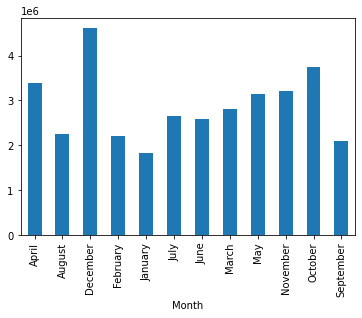

In [9]:
month1 =df.groupby("Month")["Total Earning"].sum()
month1.plot(x="Month", y="Total Earning", kind = "bar")

In [10]:
df["Order Date"]= pd.to_datetime(df["Order Date"]).dt.to_period('m')

# We changed the column to include only month and year from 'Orderdate'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185945 entries, 0 to 185944
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype    
---  ------             --------------   -----    
 0   Order ID           185945 non-null  int64    
 1   Product            185945 non-null  object   
 2   Quantity 
Ordered  185945 non-null  int64    
 3   Price Each         185945 non-null  float64  
 4   Order Date         185945 non-null  period[M]
 5   Purchase Address   185945 non-null  object   
 6   Total Earning      185945 non-null  float64  
 7   Unnamed: 7         185945 non-null  object   
 8   City1              185945 non-null  object   
 9   Unnamed: 9         185945 non-null  object   
 10  Month              185945 non-null  object   
 11  Day of the Week    185945 non-null  int64    
dtypes: float64(2), int64(3), object(6), period[M](1)
memory usage: 17.0+ MB


Text(0, 0.5, 'Total Earning')

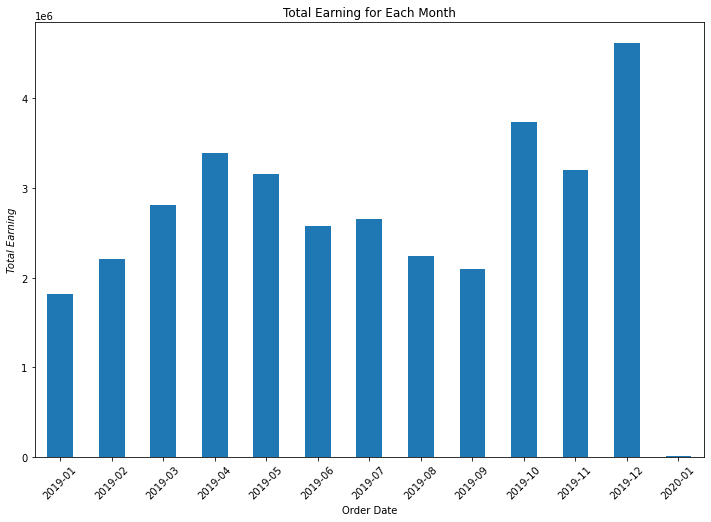

In [12]:
# Total Earning for Each Month
monthly = df.groupby("Order Date")["Total Earning"].sum()


plt.figure(figsize=(12,8))
monthly.plot(x="Order Date", y= "Total Earning", kind= "bar")
plt.xticks(rotation=45)


plt.title("Total Earning for Each Month")

plt.ylabel("Total Earning", fontstyle= 'italic')

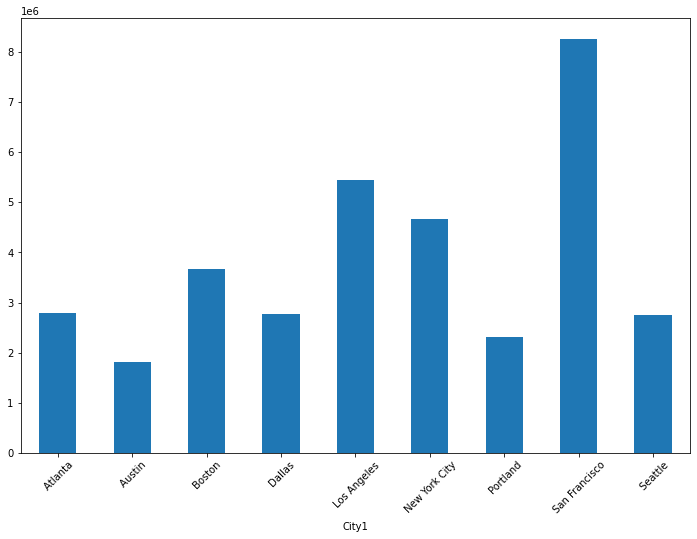

In [13]:
# Total Earning for Each City
city = df.groupby("City1")["Total Earning"].sum()

plt.figure(figsize=(12,8))
city.plot(x="City1", y="Total Earning", kind= "bar")
plt.xticks(rotation=45)

plt.show()

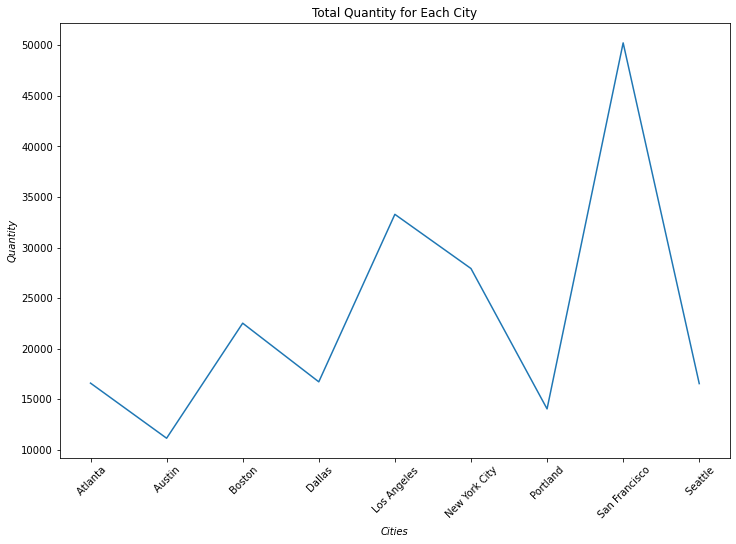

In [14]:
# How many products were sold in total in each cities?
quant = df.groupby("City1")["Quantity \nOrdered"].sum()

plt.figure(figsize=(12,8))
quant.plot(x= "City1", y= "Quantity \nOrdered", kind= "line")

plt.title("Total Quantity for Each City")
plt.ylabel("Quantity", fontstyle= "italic")
plt.xlabel("Cities", fontstyle="italic")
plt.xticks(rotation=45)


plt.show()

In [15]:
df.groupby("City1")["Quantity \nOrdered"].sum()

City1
 Atlanta          16601
 Austin           11153
 Boston           22527
 Dallas           16729
 Los Angeles      33288
 New York City    27931
 Portland         14053
 San Francisco    50239
 Seattle          16553
Name: Quantity \nOrdered, dtype: int64

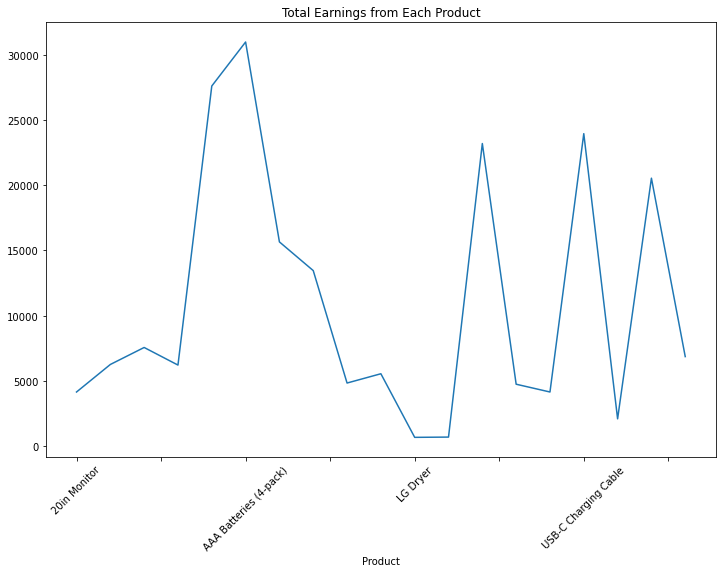

In [16]:
gr = df.groupby("Product")["Quantity \nOrdered"].sum()

plt.figure(figsize=(12,8))
gr.plot(x= "Product", y="Quantity \nOrdered", kind= "line")

plt.title("Total Earnings from Each Product")
plt.xticks(rotation=45)

plt.show()
# I examined how many the each product sold. To find out 

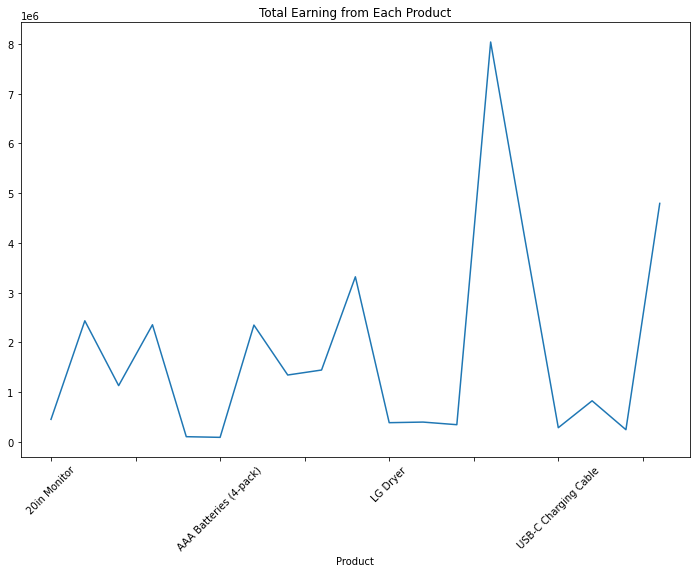

In [18]:
# Let's look at Total Revenue from each product.
gr2 = df.groupby("Product")["Total Earning"].sum()

plt.figure(figsize=(12,8))
gr2.plot(x="Product", y="Total Earning", kind= "line")

plt.title("Total Earning from Each Product")
plt.xticks(rotation= 45)

plt.show()
# If I look into the last chart before this we can see the best selling item didn't generate the most revenue.

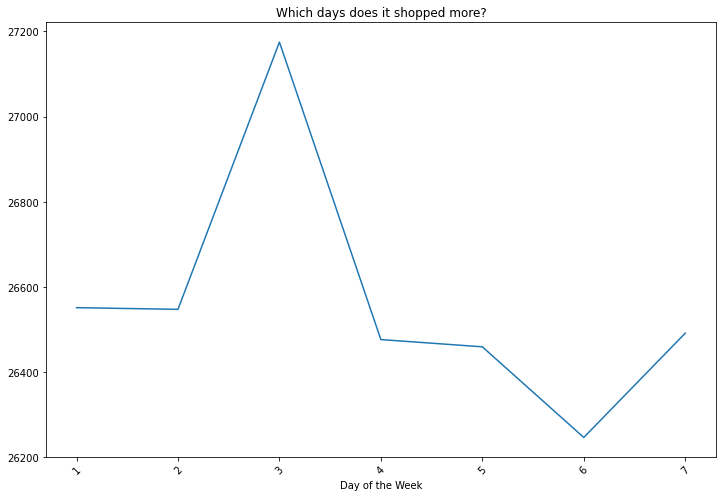

In [22]:
#which days shopped more? (1=monday, 2= tuesday, ...)

week1 = df.groupby("Day of the Week")["Day of the Week"].count()

plt.figure(figsize=(12,8))
week1.plot(x="Day of the Week", y="Day of the Week", kind="line")

plt.title("Which days does it shopped more?")
plt.xticks(rotation=45)

plt.show()